In [124]:
from bigraph_viz import plot_bigraph, VisualizeTypes

core = VisualizeTypes()

plot_settings = {"show_types": True, "rankdir": "RL", "dpi": "70"}

Writing out/volumetric


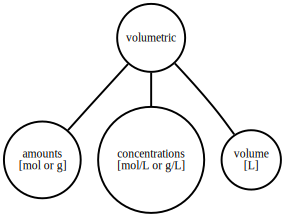

In [125]:
volumetric = {
        "amounts<br/>[mol or g]": "float",
        "concentrations<br/>[mol/L or g/L]": "float",
        "volume<br/>[L]": "float",
}
core.register("volumetric", volumetric)
core.register("mol", "float")
core.register("g", "float")
core.register("mol/L", "float")
core.register("g/L", "float")
core.register("L", "float")


single = {
    "volumetric": volumetric
}


plot_bigraph(single,
             core=core,
             filename="volumetric", **{
    # "show_types": True,
    # "rankdir": "RL",
    "dpi": "70"}
             )

Writing out/cdfba_crm


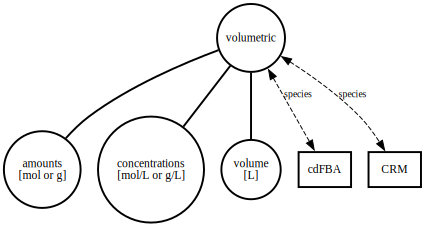

In [126]:
volumetric_process = {
    "_type": "process",
        "_inputs": {
            "species": "any",
        },
        "_outputs": {
            "species": "any",
    },
}


cdfba_crm = {
    "volumetric": volumetric,
    "cdFBA": {**volumetric_process,
        "inputs": {
            "species": ["volumetric"]
        },
        "outputs": {
            "species": ["volumetric"]
        }
    },
    "CRM": {**volumetric_process,
        "inputs": {
            "species": ["volumetric"]
        },
        "outputs": {
            "species": ["volumetric"]
        }
    },
}


plot_bigraph(cdfba_crm,
             core=core,
             filename="cdfba_crm", **{"dpi": "70"}
             )

Writing out/volumetric_multiregion


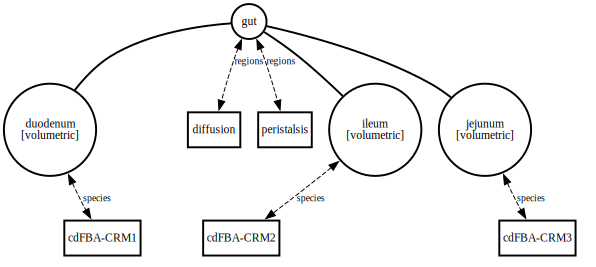

In [127]:
transport = {
        "_type": "process",
        "_inputs": {
            "regions": "any",
        },
        "_outputs": {
            "regions": "any",
        },
}


multiple = {
    "diffusion": {**transport,
        "inputs": {
            "regions": ["gut"]
        },
        "outputs": {
            "regions": ["gut"]
        }
    },
    "peristalsis": {**transport,
        "inputs": {
            "regions": ["gut"]
        },
        "outputs": {
            "regions": ["gut"]
        }
    },
    "gut": {
        "duodenum<br/>[volumetric]": {}, # volumetric,
        "ileum<br/>[volumetric]": {}, # volumetric,
        "jejunum<br/>[volumetric]": {}, # volumetric,
        "cdFBA-CRM1": {**volumetric_process,
            "inputs": {
                "species": ["duodenum<br/>[volumetric]"]
            },
            "outputs": {
                "species": ["duodenum<br/>[volumetric]"]
            }
        },
        "cdFBA-CRM2": {**volumetric_process,
            "inputs": {
                "species": ["ileum<br/>[volumetric]"]
            },
            "outputs": {
                "species": ["ileum<br/>[volumetric]"]
            }
        },
        "cdFBA-CRM3": {**volumetric_process,
            "inputs": {
                "species": ["jejunum<br/>[volumetric]"]
            },
            "outputs": {
                "species": ["jejunum<br/>[volumetric]"]
            }
        },
}}

plot_bigraph(multiple,
             core=core,
             filename="volumetric_multiregion", **{"dpi": "70",
                                                   "remove_process_place_edges": True}
             )

Writing out/fba


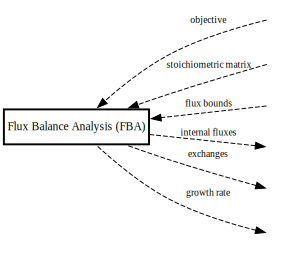

In [128]:
fba = {
    "Flux Balance Analysis (FBA)": {
        "_type": "process",
        "_inputs": {
            "flux bounds": "map[rxn_id: lower, upper]",
            "objective": "string",
            # "biomass": "string",
            "stoichiometric matrix": "array[n_metabolites × n_rxns]",
        },
        "_outputs": {
            "internal fluxes": "array[mmol/L/hr]",
            "exchanges": "array[mmol/L/hr]",
            "growth rate": "mmol/gDCW/hr",
        },
    },
}
plot_bigraph(fba, filename="fba", **plot_settings)

Writing out/crm


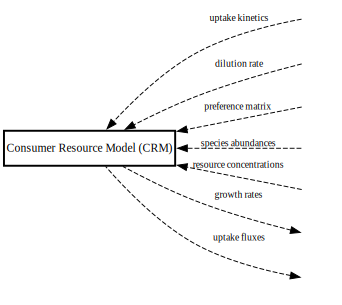

In [120]:
crm = {
    "Consumer Resource Model (CRM)": {
        "_type": "process",
        "_inputs": {
            "species abundances": "array[n_species]  # cells/mL or OD",
            "resource concentrations": "array[n_resources]  # mmol/L",
            "preference matrix": "array[n_species × n_resources]  # unitless uptake preferences",
            "uptake kinetics": "map[resource_id: {Vmax: float (mmol/L/hr), Km: float (mmol/L)}]",
            # "yields": "array[n_species × n_resources]  # biomass yield (gDCW/mmol)",
            # "maintenance costs": "array[n_species]  # mmol/L/hr or gDCW/hr",
            # "resource supply": "map[resource_id: {inflow: float (mmol/L/hr), feed_conc: float (mmol/L)}]",
            "dilution rate": "float  # 1/hr (chemostat) or 0 for batch",
            # "stoichiometry (optional)": "array[n_resources × n_species]  # if using explicit conversions",
        },
        "_outputs": {
            # "species trajectories": "array[n_species × n_timepoints]  # cells/mL or OD",
            # "resource trajectories": "array[n_resources × n_timepoints]  # mmol/L",
            "uptake fluxes": "array[n_species × n_resources × n_timepoints]  # mmol/L/hr",
            "growth rates": "array[n_species × n_timepoints]  # 1/hr",
            # "community metrics (optional)": "map[{diversity, evenness, richness}: trajectory]",
        },
    },
}
plot_bigraph(crm, filename="crm", **plot_settings)

Writing out/kinetic


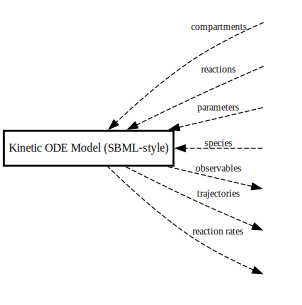

In [121]:
kinetic = {
    "Kinetic ODE Model (SBML-style)": {
        "_type": "process",
        "_inputs": {
            "compartments": "map[comp_id: volume (L)]",
            "species": "map[spec_id: {compartment: comp_id, initial_concentration: float (mol/L)}]",
            "parameters": "map[param_id: value (units vary)]",
            "reactions": (
                "list[{id, reactants: map[spec: stoich], products: map[spec: stoich], "
                "kinetic_law: str (e.g., 'k1*A - k2*B/C'), modifiers (optional): list[spec_id]}]"
            ),
        },
        "_outputs": {
            "trajectories": "array[n_species × n_timepoints]  # mol/L by compartment",
            "reaction rates": "array[n_reactions × n_timepoints]  # mol/L/s",
            "observables": "map[obs_id: array[n_timepoints]]",
        },
    },
}
plot_bigraph(kinetic, filename="kinetic", **plot_settings)


Writing out/transport


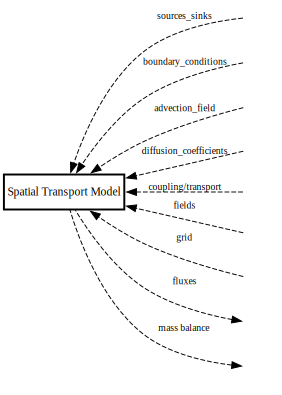

In [122]:
transport = {
    "Spatial Transport Model": {
        "_type": "process",
        "_inputs": {
            "grid": "map[{nx, ny, (nz)}, spacing: {dx, dy, (dz)}, domain: {x: (min,max), y: (min,max), (z)}]",
            "fields": "map[field_id: initial_array[grid_shape]]  # e.g., concentration (mol/m^3)",
            "diffusion_coefficients": "map[field_id: float or array[grid_shape]]  # m^2/s",
            "advection_field": "map[{vx, vy, (vz)}: array[grid_shape]]  # m/s",
            "sources_sinks": "map[field_id: function(field,state,t)->array[grid_shape]]",
            # "reactions (optional)": "map[field_id: function(fields,params)->array[grid_shape]]",
            "boundary_conditions": (
                "map[face in {left,right,top,bottom,(front,back)}: "
                "{type: 'Dirichlet'|'Neumann'|'Robin'|'Periodic', value: float|array}]"
            ),
            "coupling/transport": (
                "map[interface_id: {permeability: float (m/s), from_field: id, to_field: id}]"
            ),
            # "time stepping": "map[{dt: float (s), t_end: float (s)}]",
            # "numerics": "map[{scheme: 'FD'|'FV'|'FE', order: int, stabilization (optional): str}]",
        },
        "_outputs": {
            # "field trajectories": "map[field_id: array[n_timepoints × grid_shape]]  # mol/m^3",
            "fluxes": "map[field_id: array[n_timepoints × grid_shape × dim]]  # mol/m^2/s",
            # "boundary flux log": "map[face: array[n_timepoints]]  # integrated flux",
            "mass balance": "map[field_id: array[n_timepoints]]  # total quantity over domain",
            # "stability diagnostics (optional)": "map[{CFL, Pe, Damkohler}: array[n_timepoints]]",
        },
    },
}
plot_bigraph(transport, filename="transport", **plot_settings)

Writing out/multicellular


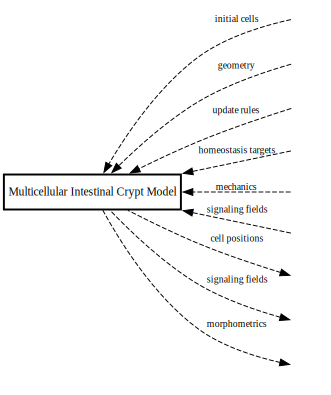

In [123]:
multicellular = {
    "Multicellular Intestinal Crypt Model": {
        "_type": "composite",  # composed of sub-processes (mechanics, cell cycle, signaling, transport)
        "_inputs": {
            "geometry": (
                "map[{type: '1D_axis'|'2D_lattice'|'3D_mesh', "
                "mesh/lattice: data, metrics: {basement_membrane: surface, lumen: region}}]"
            ),
            # "cell types": (
            #     "map[type_id in {stem, TA, differentiated, Paneth, Goblet, Enterocyte}: "
            #     "{proliferation_rate (1/hr), differentiation_rules, apoptosis_rules, "
            #     "adhesion_params, size, target_volume}]"
            # ),
            "initial cells": (
                "list[{id, type_id, position, polarity (optional), cycle_state, "
                "receptor_levels (optional)}]"
            ),
            "update rules": "map[...]",
            "mechanics": (
                "map[{model: 'CPM'|'vertex'|'agent-force', "
                "parameters: {adhesion, cortical_tension, elasticity, friction}}]"
            ),
            "signaling fields": (
                "map[field_id in {Wnt, BMP, Notch_ligands, EGF, morphogens}: "
                "{initial: array[grid_shape], source_regions, decay_rate, diffusion_coeff}]"
            ),
            # "transport/coupling": "as in Spatial Transport Model (for morphogen fields)",
            # "migration rules": "function(cell, neighbors, fields, t) -> new_position/force",
            "homeostasis targets": (
                "map[{height_range, stem_cell_zone_extent, turnover_time (hrs), "
                "cell_counts_by_type}]"
            ),
            # "boundary_conditions": "for both cells (adhesion/reflect) and fields (Dirichlet/Neumann)",
        },
        "_outputs": {
            "cell positions": "",
            # "population statistics": (
            #     "map[time: {counts_by_type, stem_zone_height, crypt_height, turnover_rate}]"
            # ),
            # "lineages": "map[cell_id: lineage_tree]",
            "signaling fields": "map[field_id: array[n_timepoints × grid_shape]]",
            "morphometrics": "map[time: {cell_areas/volumes, packing, curvature}]",
        },
    },
}
plot_bigraph(multicellular, filename="multicellular", **plot_settings)
